<a href="https://colab.research.google.com/github/nemo-mei/331-miniproject-ziyuan/blob/main/mini_project_ZiYuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests # import requests module to handle HTTP requests

url = 'https://bluearchive.wiki/wiki/Characters' #Data URL for web scrapping

# Create a header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

# Fetch the page content using requests with custom headers
response = requests.get(url, headers=headers)

# Now read the html from the response content
tables = pd.read_html(response.text)
first_table = tables[0]

#Cleanning data by remove and sort the "NaN" data
df = first_table [["Name", "School", "Role", "Position", "Attack Type", "Armor Type", "Combat Class", "Unnamed: 9"]]

df

<ipython-input-2-59f1b9975f6f>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


,Name,School,Role,Position,Attack Type,Armor Type,Combat Class,Unnamed: 9
0,Airi,Trinity,Support,Back,Explosive,Light,Special,SMG
1,Airi (Band),Trinity,Attacker,Front,Explosive,Special,Striker,SMG
2,Akane,Millennium,Support,Middle,Penetration,Light,Striker,HG
3,Akane (Bunny Girl),Millennium,Attacker,Back,Mystic,Heavy,Special,HG
4,Akari,Gehenna,Attacker,Middle,Explosive,Heavy,Striker,AR
...,...,...,...,...,...,...,...,...
195,Yukari,Hyakkiyako,Attacker,Back,Sonic,Heavy,Striker,SR
196,Yuuka,Millennium,Tank,Front,Explosive,Heavy,Striker,SMG
197,Yuuka (Sportswear),Millennium,Tank,Front,Mystic,Special,Striker,SMG
198,Yuzu,Millennium,Attacker,Middle,Penetration,Special,Striker,GL


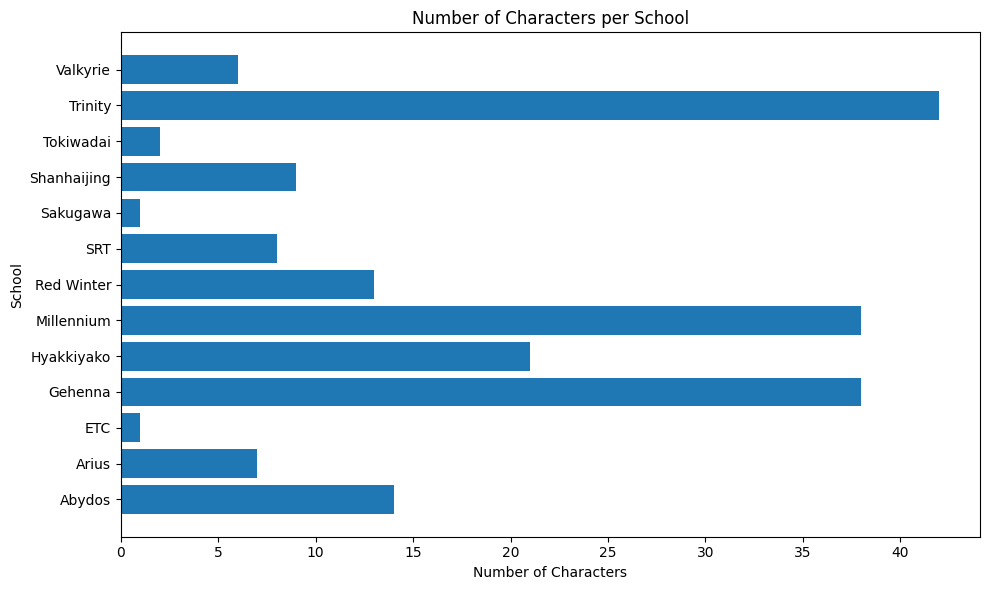

In [8]:
# prompt: 根据school这个列来整理数据并且制作一个水平条状图

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous code
school_counts = df.groupby('School')['Name'].count()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(school_counts.index, school_counts.values)
plt.xlabel('Number of Characters')
plt.ylabel('School')
plt.title('Number of Characters per School')
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

<ipython-input-5-aaabfb27073c>:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


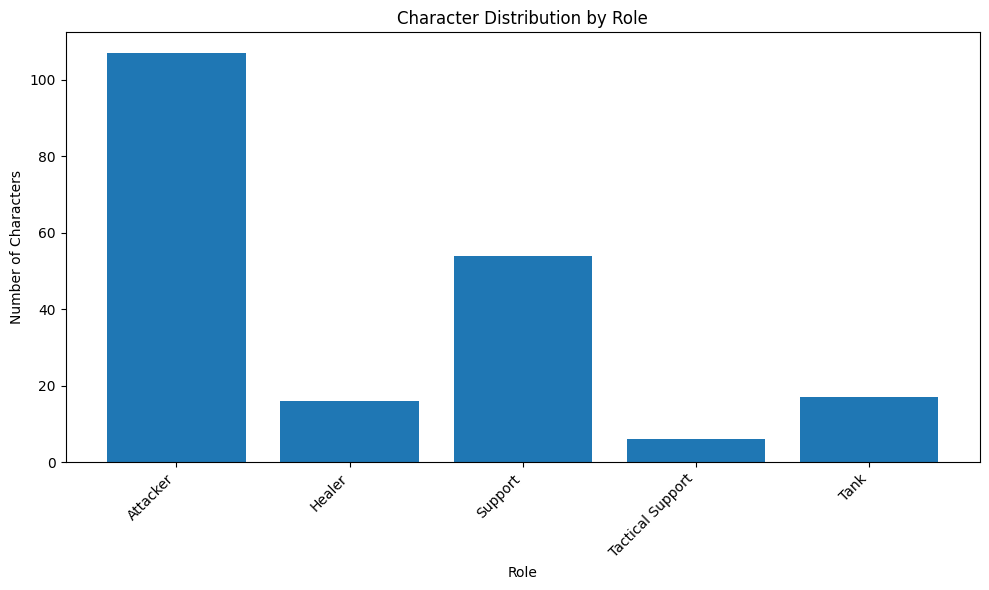

In [5]:
# prompt: 生成一个bar chart根据Role列

import pandas as pd
import requests # import requests module to handle HTTP requests
import matplotlib.pyplot as plt

url = 'https://bluearchive.wiki/wiki/Characters' #Data URL

# Create a header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

# Fetch the page content using requests with custom headers
response = requests.get(url, headers=headers)

# Now read the html from the response content
tables = pd.read_html(response.text)
first_table = tables[0]

#Cleanning data by remove and sort the "NaN" data
df = first_table [["Name", "School", "Role", "Position", "Attack Type", "Armor Type", "Combat Class", "Unnamed: 9"]]


# Group data by 'Role' and count the number of characters in each role
role_counts = df.groupby('Role')['Name'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(role_counts.index, role_counts.values)
plt.xlabel('Role')
plt.ylabel('Number of Characters')
plt.title('Character Distribution by Role')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()